# Bar Chart #1: Top 10 Boston Coordinates with the Most Crime 
This information isn't the most useful, as users would have to check where the exact coordinates are but is still helpful to see the quantity in which crimes (serious and nonserious) are occurring

In [118]:
import pandas as pd
import altair as alt

# Load the CSV file into a DataFrame
df = pd.read_csv('pd_data_clean.csv')

# Group by 'Location' and count the number of crimes for each location
crime_counts = df['Location'].value_counts().reset_index()
crime_counts.columns = ['Location', 'Number of Crimes']

# Limit to the top 10 locations
crime_counts = crime_counts.head(10)

# Create a bar chart using Altair
chart = alt.Chart(crime_counts).mark_bar().encode(
    x=alt.X('Location:N', title='Location', sort='-y'),
    y=alt.Y('Number of Crimes:Q', title='Number of Crimes'),
    color=alt.Color('Location:N', legend=None),
    tooltip=['Location:N', 'Number of Crimes:Q']
).properties(
    title='Top 10 Locations by Number of Crimes',
    width=800,
    height=400
).configure_axis(
    labelAngle=-45  # Rotate x-axis labels for better readability
)

# Display the chart
chart


/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

# Bar Chart #2: Top 10 Streets in Boston with Serious Crimes
This barchart shows which exact streets have the most crimes in Boston, filtered by the crime being "Serious" in nature. This means that the crime involved some sort of intense violence such as assault, manslaughter, vandalism, drugs, arseny, etc. (we will go more in depth about the classification in the presentation). Using the Street names, although doesn't show the exact location, gives the user a better idea of certain areas that have more crime.

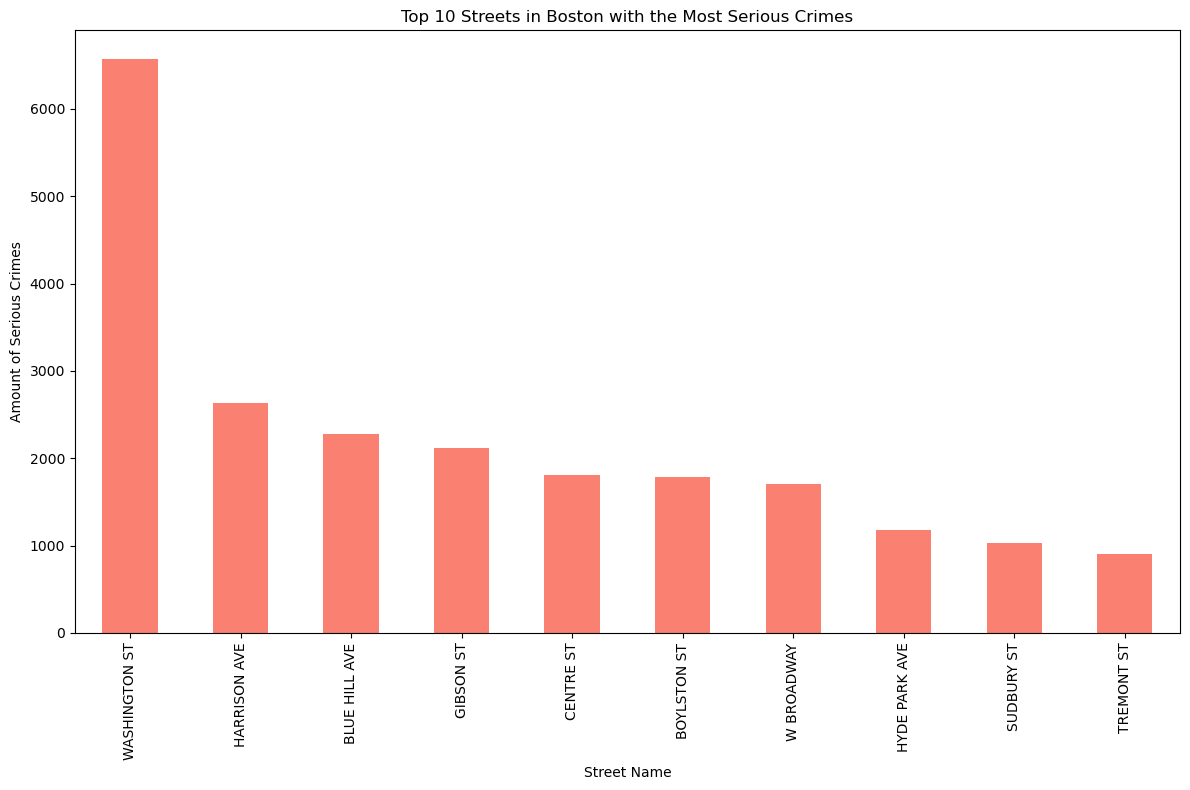

In [122]:
# Filter the data to include only serious crimes (SERIOUS == 1)
serious_crimes = df[df['SERIOUS'] == 1]

# Count the number of serious crimes per street
serious_crimes_count = serious_crimes['STREET'].value_counts()

# Get the top 10 streets with the most serious crimes
top_10_serious_streets = serious_crimes_count.nlargest(10)

# Plot a bar chart for the top 10 streets with serious crimes
top_10_serious_streets.plot(kind='bar', color='salmon', figsize=(12, 8))

# Add titles and labels
plt.title('Top 10 Streets in Boston with the Most Serious Crimes')
plt.xlabel('Street Name')
plt.ylabel('Amount of Serious Crimes')
plt.xticks(rotation=90)  # Rotate street names for better readability
plt.tight_layout()

# Show the plot
plt.show()


# Interactive Map #1: All Crime in Boston
This map uses the longitude and latitude data to pin point exactly where serious/non serious crimes occurred in Boston. Users are able to scroll and zoom in/out of areas to see where crimes occurred. There is an HTML file that is produced from this, where you can utilize the interactive map.

In [2]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the CSV file into a DataFrame
df = pd.read_csv('pd_data_clean.csv')

# Ensure 'Lat' and 'Long' are numeric and handle errors (non-numeric values will be NaN)
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Long'] = pd.to_numeric(df['Long'], errors='coerce')

# Drop rows with missing latitude or longitude values
df_cleaned = df.dropna(subset=['Lat', 'Long'])

# Count the number of crimes at each latitude and longitude
crime_counts = df_cleaned.groupby(['Lat', 'Long']).size().reset_index(name='Number of Crimes')

# Ensure that the crime counts dataframe is not empty
if crime_counts.empty:
    print("No valid crime data available.")
else:
    # Limit to top 100 locations by number of crimes to reduce file size
    crime_counts = crime_counts.nlargest(100, 'Number of Crimes')

    # Create a base map centered around the average latitude and longitude of the data
    map_center = [df_cleaned['Lat'].mean(), df_cleaned['Long'].mean()]
    crime_map = folium.Map(location=map_center, zoom_start=12)

    # Use a MarkerCluster to reduce the number of individual markers
    marker_cluster = MarkerCluster().add_to(crime_map)

    # Add markers to the map
    for index, row in crime_counts.iterrows():
        folium.Marker(
            location=[row['Lat'], row['Long']],
            popup=f"Crimes: {row['Number of Crimes']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(marker_cluster)

    # Save the map to an HTML file (optimized for smaller size)
    crime_map.save('crime_map.html')

    # Display the map (works in Jupyter environments)
    crime_map


# Interactive Map #2: Serious Crime
This map uses a filter to show the "serious" crimes that occurred in Boston. 

In [134]:
import pandas as pd
import folium

# Load the CSV file into a DataFrame
df = pd.read_csv('pd_data_clean.csv')

# Ensure 'Lat' and 'Long' are numeric and handle errors (non-numeric values will be NaN)
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Long'] = pd.to_numeric(df['Long'], errors='coerce')

# Filter the data to include only serious crimes (SERIOUS == 1)
df_serious = df[df['SERIOUS'] == 1]

# Drop rows with missing latitude or longitude values for serious crimes
df_serious_cleaned = df_serious.dropna(subset=['Lat', 'Long'])

# Check the first few rows of cleaned data to ensure proper coordinates
print(df_serious_cleaned[['Lat', 'Long']].head())

# Count the number of serious crimes at each latitude and longitude
crime_counts_serious = df_serious_cleaned.groupby(['Lat', 'Long']).size().reset_index(name='Number of Serious Crimes')

# Ensure that the serious crime counts dataframe is not empty
if crime_counts_serious.empty:
    print("No serious crime data available.")
else:
    # Create a base map centered around the average latitude and longitude of all the data
    map_center = [df_serious_cleaned['Lat'].mean(), df_serious_cleaned['Long'].mean()]
    serious_crime_map = folium.Map(location=map_center, zoom_start=12)

    # Add markers to the map for each serious crime location
    for index, row in crime_counts_serious.iterrows():
        folium.Marker(
            location=[row['Lat'], row['Long']],
            popup=f"Location: {row['Lat']}, {row['Long']}<br>Number of Serious Crimes: {row['Number of Serious Crimes']}",
            icon=folium.Icon(color='red', icon='info-sign')  # Red color for serious crimes
        ).add_to(serious_crime_map)

    # Save the map to an HTML file (useful for non-Jupyter environments)
    serious_crime_map.save('serious_crime_map.html')

    # Display the map (works in Jupyter environments)
    serious_crime_map


          Lat       Long
4   42.310269 -71.089311
10  42.295981 -71.089761
15  42.256092 -71.120797
18  42.313888 -71.065866
25  42.269567 -71.090750


In [4]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the CSV file into a DataFrame
df = pd.read_csv('pd_data_clean.csv')

# Ensure 'Lat' and 'Long' are numeric and handle errors (non-numeric values will be NaN)
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Long'] = pd.to_numeric(df['Long'], errors='coerce')

# Filter the data to include only serious crimes (SERIOUS == 1)
df_serious = df[df['SERIOUS'] == 1]

# Drop rows with missing latitude or longitude values for serious crimes
df_serious_cleaned = df_serious.dropna(subset=['Lat', 'Long'])

# Count the number of serious crimes at each latitude and longitude
crime_counts_serious = df_serious_cleaned.groupby(['Lat', 'Long']).size().reset_index(name='Number of Serious Crimes')

# Ensure that the serious crime counts dataframe is not empty
if crime_counts_serious.empty:
    print("No serious crime data available.")
else:
    # Limit to top 100 locations by the number of serious crimes to reduce file size
    crime_counts_serious = crime_counts_serious.nlargest(100, 'Number of Serious Crimes')

    # Create a base map centered around the average latitude and longitude of all the data
    map_center = [df_serious_cleaned['Lat'].mean(), df_serious_cleaned['Long'].mean()]
    serious_crime_map = folium.Map(location=map_center, zoom_start=12)

    # Use a MarkerCluster to reduce the number of individual markers
    marker_cluster = MarkerCluster().add_to(serious_crime_map)

    # Add markers to the map for each serious crime location
    for index, row in crime_counts_serious.iterrows():
        folium.Marker(
            location=[row['Lat'], row['Long']],
            popup=f"Crimes: {row['Number of Serious Crimes']}",
            icon=folium.Icon(color='red', icon='info-sign')  # Red color for serious crimes
        ).add_to(marker_cluster)

    # Save the map to an HTML file (optimized for smaller size)
    serious_crime_map.save('serious_crime_map.html')

    # Display the map (works in Jupyter environments)
    serious_crime_map


# Interactive Map #3: Shootings
This interactive map specifically shows shootings in certain areas of Boston. 

In [ ]:
import pandas as pd
import folium

# Load the CSV file into a DataFrame
df = pd.read_csv('pd_data_clean.csv')

# Ensure 'Lat' and 'Long' are numeric and handle errors (non-numeric values will be NaN)
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Long'] = pd.to_numeric(df['Long'], errors='coerce')

# Filter the data for serious crimes (SERIOUS == 1) and shootings (SHOOTING == 1)
df_shootings = df[(df['SERIOUS'] == 1) & (df['SHOOTING'] == 1)]

# Drop rows with missing latitude or longitude values for shootings
df_shootings_cleaned = df_shootings.dropna(subset=['Lat', 'Long'])

# Check the first few rows of cleaned data to ensure proper coordinates
print(df_shootings_cleaned[['Lat', 'Long']].head())

# Count the number of shootings at each latitude and longitude
shooting_counts = df_shootings_cleaned.groupby(['Lat', 'Long']).size().reset_index(name='Number of Shootings')

# Ensure that the shootings dataframe is not empty
if shooting_counts.empty:
    print("No shooting data available.")
else:
    # Create a base map centered around the average latitude and longitude of all the data
    map_center = [df_shootings_cleaned['Lat'].mean(), df_shootings_cleaned['Long'].mean()]
    shooting_map = folium.Map(location=map_center, zoom_start=12)

    # Add markers to the map for each shooting location
    for index, row in shooting_counts.iterrows():
        folium.Marker(
            location=[row['Lat'], row['Long']],
            popup=f"Location: {row['Lat']}, {row['Long']}<br>Number of Shootings: {row['Number of Shootings']}",
            icon=folium.Icon(color='darkred', icon='info-sign')  # Dark red for shootings
        ).add_to(shooting_map)

    # Save the map to an HTML file (useful for non-Jupyter environments)
    shooting_map.save('shooting_map.html')

    # Display the map (works in Jupyter environments)
    shooting_map